<a href="https://colab.research.google.com/github/AnujKrishnaPhuyal/DeepLearning-Practices/blob/main/using_non_linear_data_for_binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [297]:
import torch
import matplotlib.pyplot as plt
from torch import nn
import numpy as np
import pandas as pd


In [298]:
torch.__version__

'2.0.0+cu118'

#Bringing non  linear datasets from sklearn

In [299]:
from sklearn.datasets import make_circles

In [300]:
samples = 1000
X,y=make_circles(samples,noise=0.03,random_state=42)


In [301]:
X[:5,1]

array([ 0.23148074,  0.15325888,  0.17328203,  0.69288277, -0.89672343])

In [302]:
X[:8,1]

array([ 0.23148074,  0.15325888,  0.17328203,  0.69288277, -0.89672343,
        0.67643477,  0.80334872,  0.14775959])

In [303]:
df = pd.DataFrame({"X1":X[:,0],"X2":X[:,1],"label":y})

In [304]:
df.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


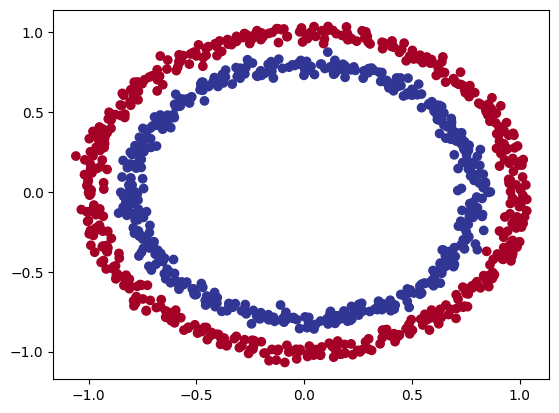

In [305]:
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)


#Converting to tensors type from the numpy

In [306]:
X[:10],y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343],
        [-0.47964637,  0.67643477],
        [-0.01364836,  0.80334872],
        [ 0.77151327,  0.14775959],
        [-0.16932234, -0.79345575],
        [-0.1214858 ,  1.02150905]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [307]:
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)


In [308]:
from sklearn.model_selection import train_test_split

In [309]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2,
                                                    random_state=42
)

In [310]:
X_test



tensor([[-3.7519e-01,  6.8266e-01],
        [ 1.5380e-02,  9.6003e-01],
        [-7.0278e-01, -3.1472e-01],
        [-2.8525e-01,  9.6638e-01],
        [ 4.0242e-01, -7.4375e-01],
        [ 6.3228e-01, -5.7111e-01],
        [ 8.5607e-01,  5.4994e-01],
        [ 1.0034e+00,  1.9028e-01],
        [-7.4892e-01, -2.9511e-01],
        [ 5.3780e-02,  9.7388e-01],
        [-4.7020e-01,  7.8749e-01],
        [-2.1686e-01,  7.2418e-01],
        [ 9.7026e-01,  3.6688e-01],
        [-5.8446e-01, -5.7415e-01],
        [-9.1147e-01, -2.4631e-01],
        [ 7.6892e-01, -7.3249e-02],
        [ 3.8408e-01,  6.8299e-01],
        [-6.8364e-01,  7.1417e-01],
        [-5.7777e-01,  5.3652e-01],
        [-8.3274e-01,  4.6625e-01],
        [ 1.2448e-02,  9.8709e-01],
        [ 1.0091e+00, -2.1970e-01],
        [-6.6792e-01,  4.2861e-01],
        [-8.4405e-01,  6.1718e-01],
        [ 6.3680e-01,  7.4591e-01],
        [ 8.9413e-01,  3.6390e-01],
        [-2.3460e-01, -9.6400e-01],
        [ 8.5954e-01, -5.214

#Now building a model with non linearity

In [311]:
from torch import nn

In [312]:
class Non_linearClass(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()
  def forward(self,x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x))))

    )  

In [313]:
model_2=Non_linearClass()

In [314]:
model_2

Non_linearClass(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [315]:
model_2.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.2212,  0.1259],
                      [ 0.1544, -0.2900],
                      [ 0.6767,  0.1943],
                      [-0.4537,  0.5559],
                      [-0.5904,  0.1670],
                      [ 0.1761, -0.1107],
                      [ 0.2559, -0.1638],
                      [ 0.3124,  0.1901],
                      [-0.3990, -0.4765],
                      [ 0.5791, -0.2110]])),
             ('layer_1.bias',
              tensor([ 0.2606,  0.1314,  0.3936,  0.4850, -0.0620,  0.5400, -0.6465,  0.2509,
                      -0.0266,  0.2979])),
             ('layer_2.weight',
              tensor([[ 0.2885, -0.0559,  0.0184,  0.2464,  0.1707,  0.2291, -0.1960,  0.0093,
                       -0.0843,  0.2060],
                      [ 0.0611, -0.1826, -0.2219,  0.1103, -0.1268, -0.1317,  0.2645,  0.2930,
                        0.1296,  0.2622],
                      [ 0.2890,  0.0943, -0.0323,  0.0214,  0.2663, -0.2

In [316]:
loss_fn=nn.BCEWithLogitsLoss()

In [317]:
optimizer = torch.optim.SGD(model_2.parameters(),
                         lr=0.01)

In [318]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc
    

In [319]:
X_test[:4],y_test[:4]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664]]),
 tensor([1., 0., 1., 0.]))

In [320]:
epochs=1000
loss_train=[]
loss_test=[]
for epoch in range(epochs):
  model_2.train()
  y_logits = model_2(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  loss=loss_fn(y_logits,y_train)
  acc=accuracy_fn(y_train,y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_2.eval()
  with torch.inference_mode():
    # 1. Forward pass
        test_logits = model_2(X_test).squeeze() 
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)
        loss_train.append(loss.detach().numpy())
        loss_test.append(test_loss.detach().numpy())

        
  if epoch%100 ==0:
    print(f"Epoch:{epoch},train_loss:{loss:.3f},test_loss:{test_loss:.3f},train_accuracy:{acc:.3f},test_acc:{test_acc:.3f}")    

Epoch:0,train_loss:0.698,test_loss:0.698,train_accuracy:50.000,test_acc:50.000
Epoch:100,train_loss:0.695,test_loss:0.696,train_accuracy:50.000,test_acc:50.000
Epoch:200,train_loss:0.694,test_loss:0.694,train_accuracy:46.125,test_acc:45.000
Epoch:300,train_loss:0.693,test_loss:0.694,train_accuracy:49.625,test_acc:44.500
Epoch:400,train_loss:0.693,test_loss:0.693,train_accuracy:49.875,test_acc:45.000
Epoch:500,train_loss:0.692,test_loss:0.693,train_accuracy:50.375,test_acc:45.000
Epoch:600,train_loss:0.692,test_loss:0.693,train_accuracy:49.750,test_acc:48.000
Epoch:700,train_loss:0.692,test_loss:0.692,train_accuracy:49.625,test_acc:49.000
Epoch:800,train_loss:0.692,test_loss:0.692,train_accuracy:49.625,test_acc:50.500
Epoch:900,train_loss:0.692,test_loss:0.692,train_accuracy:50.000,test_acc:51.000


In [321]:
def plot_pred(X_test_data=X_test,
              y_test_data=y_test,
              predictions=None):
  pass

In [322]:
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


# Plot linear data or training and test and predictions (optional)
def plot_predictions(
    train_data, train_labels, test_data, test_labels, predictions=None
):
    """
  Plots linear training data and test data and compares predictions.
  """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14})

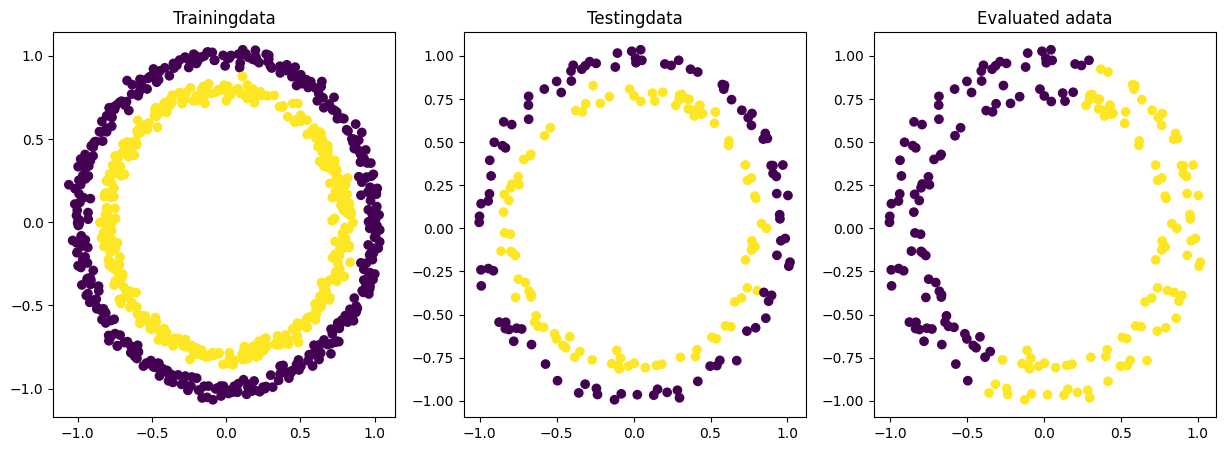

In [338]:
model_2.eval()
with torch.inference_mode():
   test_logits = model_2(X_test).squeeze() 
   y_pred = torch.round(torch.sigmoid(test_logits))
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title("Trainingdata")
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
plt.subplot(1,3,2)
plt.title("Testingdata")

plt.scatter(X_test[:,0],X_test[:,1],c=y_test)
plt.subplot(1,3,3)
plt.title("Evaluated adata")

plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)
plt.show()
